# Project - Data Preparation

**Instructions:**

3. Data Preparation:

Data Integration:
Merge datasets from multiple sources, documenting entity relationships.

Data Sampling:
Justify data sampling needs based on dataset characteristics or modeling requirements.

Handling Missing Values:
Implement methods for handling missing data (e.g., imputation, deletion) based on previous analysis.

Feature Engineering:
Create new features or transform existing ones to enhance predictive modeling, leveraging domain knowledge.

Data Cleaning and Preprocessing:
Perform necessary data cleaning steps such as removing duplicates, correcting inconsistencies, and formatting data types.

In [3]:
# Imports:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [4]:
# Import warnings for consistency in data analysis
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
data = pd.read_csv('C:/Users/miche/OneDrive/Desktop/Comp-2040 Python Essentials/Final Project/world_tourism_economy_data.csv')
data.head(10)

,country,country_code,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_departures,tourism_expenditures,gdp,inflation,unemployment
0,Aruba,ABW,1999,7.820000e+08,9.720000e+05,62.542949,NaN,9.495387,1.722905e+09,2.280372,NaN
1,Africa Eastern and Southern,AFE,1999,8.034209e+09,1.530938e+07,12.204030,NaN,7.760536,2.654290e+11,7.819865,NaN
2,Afghanistan,AFG,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,1999,1.443613e+09,3.897975e+06,3.974476,NaN,6.147291,1.394680e+11,0.372266,NaN
4,Angola,AGO,1999,3.100000e+07,4.500000e+04,0.583858,NaN,2.489638,6.152923e+09,248.195902,NaN
5,Albania,ALB,1999,2.180000e+08,3.710000e+05,55.969191,NaN,3.699007,3.212122e+09,0.389438,18.40
6,Andorra,AND,1999,NaN,9.422000e+06,NaN,NaN,NaN,1.240295e+09,NaN,NaN
7,Arab World,ARB,1999,NaN,NaN,NaN,NaN,NaN,6.654150e+11,2.669374,NaN
8,United Arab Emirates,ARE,1999,8.930000e+08,NaN,NaN,NaN,NaN,8.444547e+10,NaN,NaN
9,Argentina,ARG,1999,3.175000e+09,2.898000e+06,11.340372,NaN,15.889092,2.835230e+11,NaN,14.05


# Initial Analysis

In [7]:
# Insure all columns have their appropriate data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               6650 non-null   object 
 1   country_code          6650 non-null   object 
 2   year                  6650 non-null   int64  
 3   tourism_receipts      4289 non-null   float64
 4   tourism_arrivals      4949 non-null   float64
 5   tourism_exports       4114 non-null   float64
 6   tourism_departures    2589 non-null   float64
 7   tourism_expenditures  4173 non-null   float64
 8   gdp                   6424 non-null   float64
 9   inflation             5668 non-null   float64
 10  unemployment          3658 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 571.6+ KB


In [8]:
data.duplicated().sum()

0

In [9]:
data.isna().sum()

country                    0
country_code               0
year                       0
tourism_receipts        2361
tourism_arrivals        1701
tourism_exports         2536
tourism_departures      4061
tourism_expenditures    2477
gdp                      226
inflation                982
unemployment            2992
dtype: int64

In [10]:
# Given the large number of nulls, removing the missing rows entirely wouldn't be the most efficient method.
# With this information, I will fill these null values with the mean of the given column.

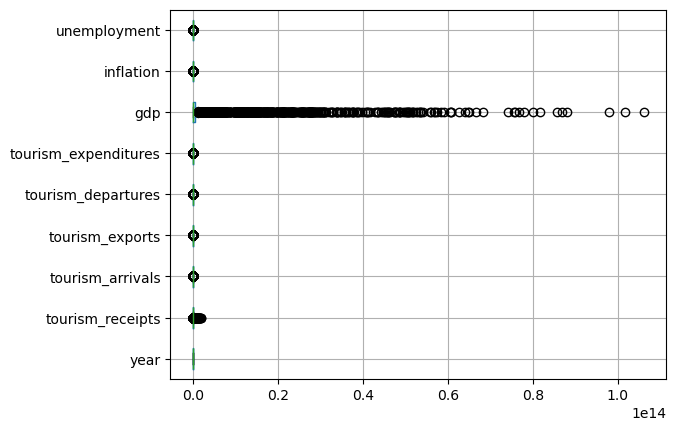

In [11]:
# Check for outliers
data.boxplot(vert=False)
plt.show()

In [12]:
# With these results, I believe that dealing with the outliers - by removing them - would be the best option. This will have
# to be done before initial analysis for better, and more accurate results.

# Deal with Outliers

The Interquartile Range (IQR) of GDP is: 420610818287.25
Lower Bound: -624829045718.125
Upper Bound: 1057614227430.875


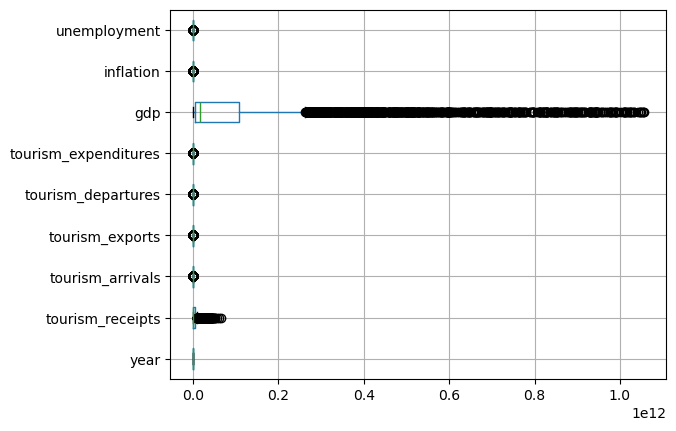

In [14]:
Q1 = data['gdp'].quantile(0.25)  
Q3 = data['gdp'].quantile(0.75)  

# Calculate IQR  
IQR = Q3 - Q1  

# Calculate lower and upper bounds  
lower_bound = Q1 - 1.5 * IQR  
upper_bound = Q3 + 1.5 * IQR  

print("The Interquartile Range (IQR) of GDP is:", IQR)  
print("Lower Bound:", lower_bound)  
print("Upper Bound:", upper_bound)  

# Update dataset without outliers
data = data[(data['gdp'] >= lower_bound) & (data['gdp'] <= upper_bound)]

data.boxplot(vert=False)
plt.show()

# Clean data

In [16]:
# Deal with categorical columns
data['country'] = data['country'].str.strip().str.lower()
data['country_code'] = data['country_code'].str.strip().str.lower()

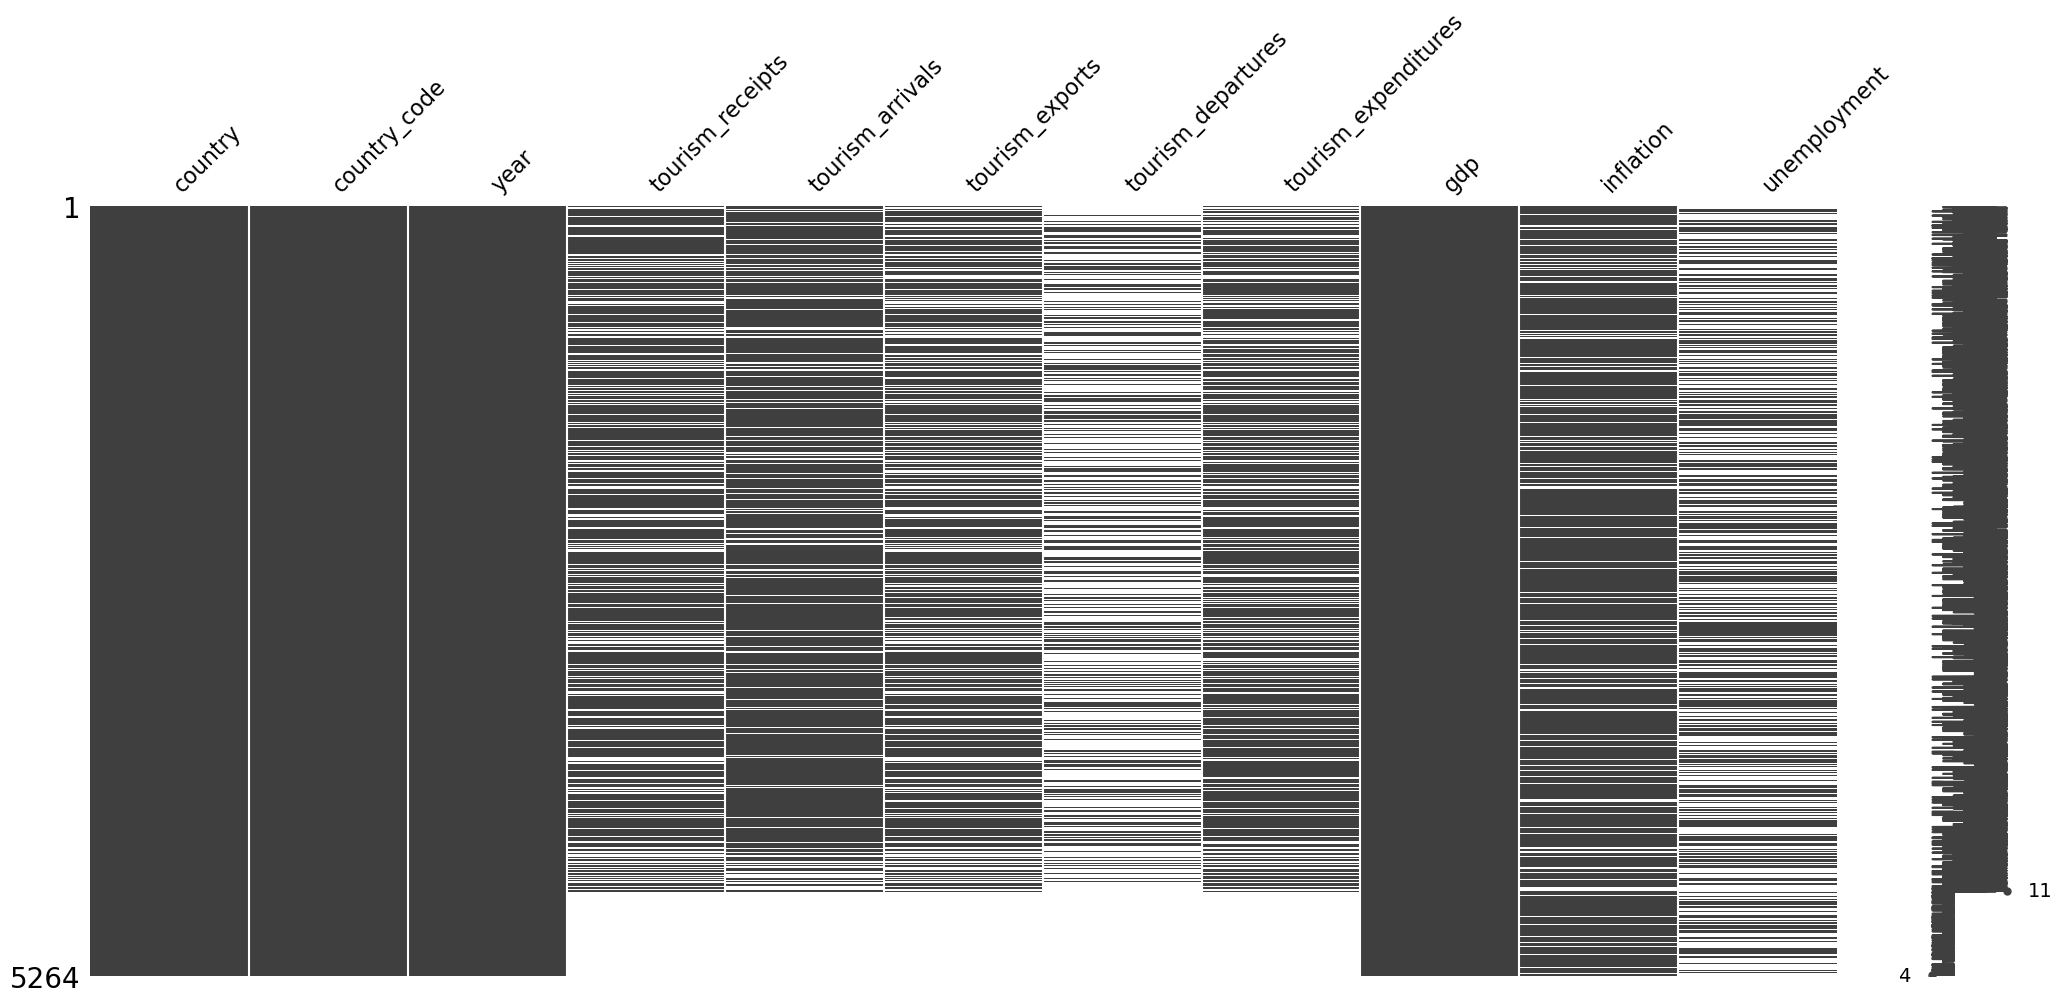

In [17]:
# Handle missing data - Visualization
msno.matrix(data)
plt.show()

In [18]:
# Handle missing data - Fill nulls with mean values
inconsistent_columns = ['tourism_receipts', 'tourism_arrivals', 'tourism_exports', 'tourism_departures', 'tourism_expenditures', 
                        'gdp', 'inflation', 'unemployment']


for i in inconsistent_columns:
    mean = data[i].mean()
    data[i].fillna(mean, inplace=True)

data.head()

,country,country_code,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_departures,tourism_expenditures,gdp,inflation,unemployment
0,aruba,abw,1999,7.820000e+08,9.720000e+05,62.542949,6.534997e+06,9.495387,1.722905e+09,2.280372,8.198614
1,africa eastern and southern,afe,1999,8.034209e+09,1.530938e+07,12.204030,6.534997e+06,7.760536,2.654290e+11,7.819865,8.198614
3,africa western and central,afw,1999,1.443613e+09,3.897975e+06,3.974476,6.534997e+06,6.147291,1.394680e+11,0.372266,8.198614
4,angola,ago,1999,3.100000e+07,4.500000e+04,0.583858,6.534997e+06,2.489638,6.152923e+09,248.195902,8.198614
5,albania,alb,1999,2.180000e+08,3.710000e+05,55.969191,6.534997e+06,3.699007,3.212122e+09,0.389438,18.400000


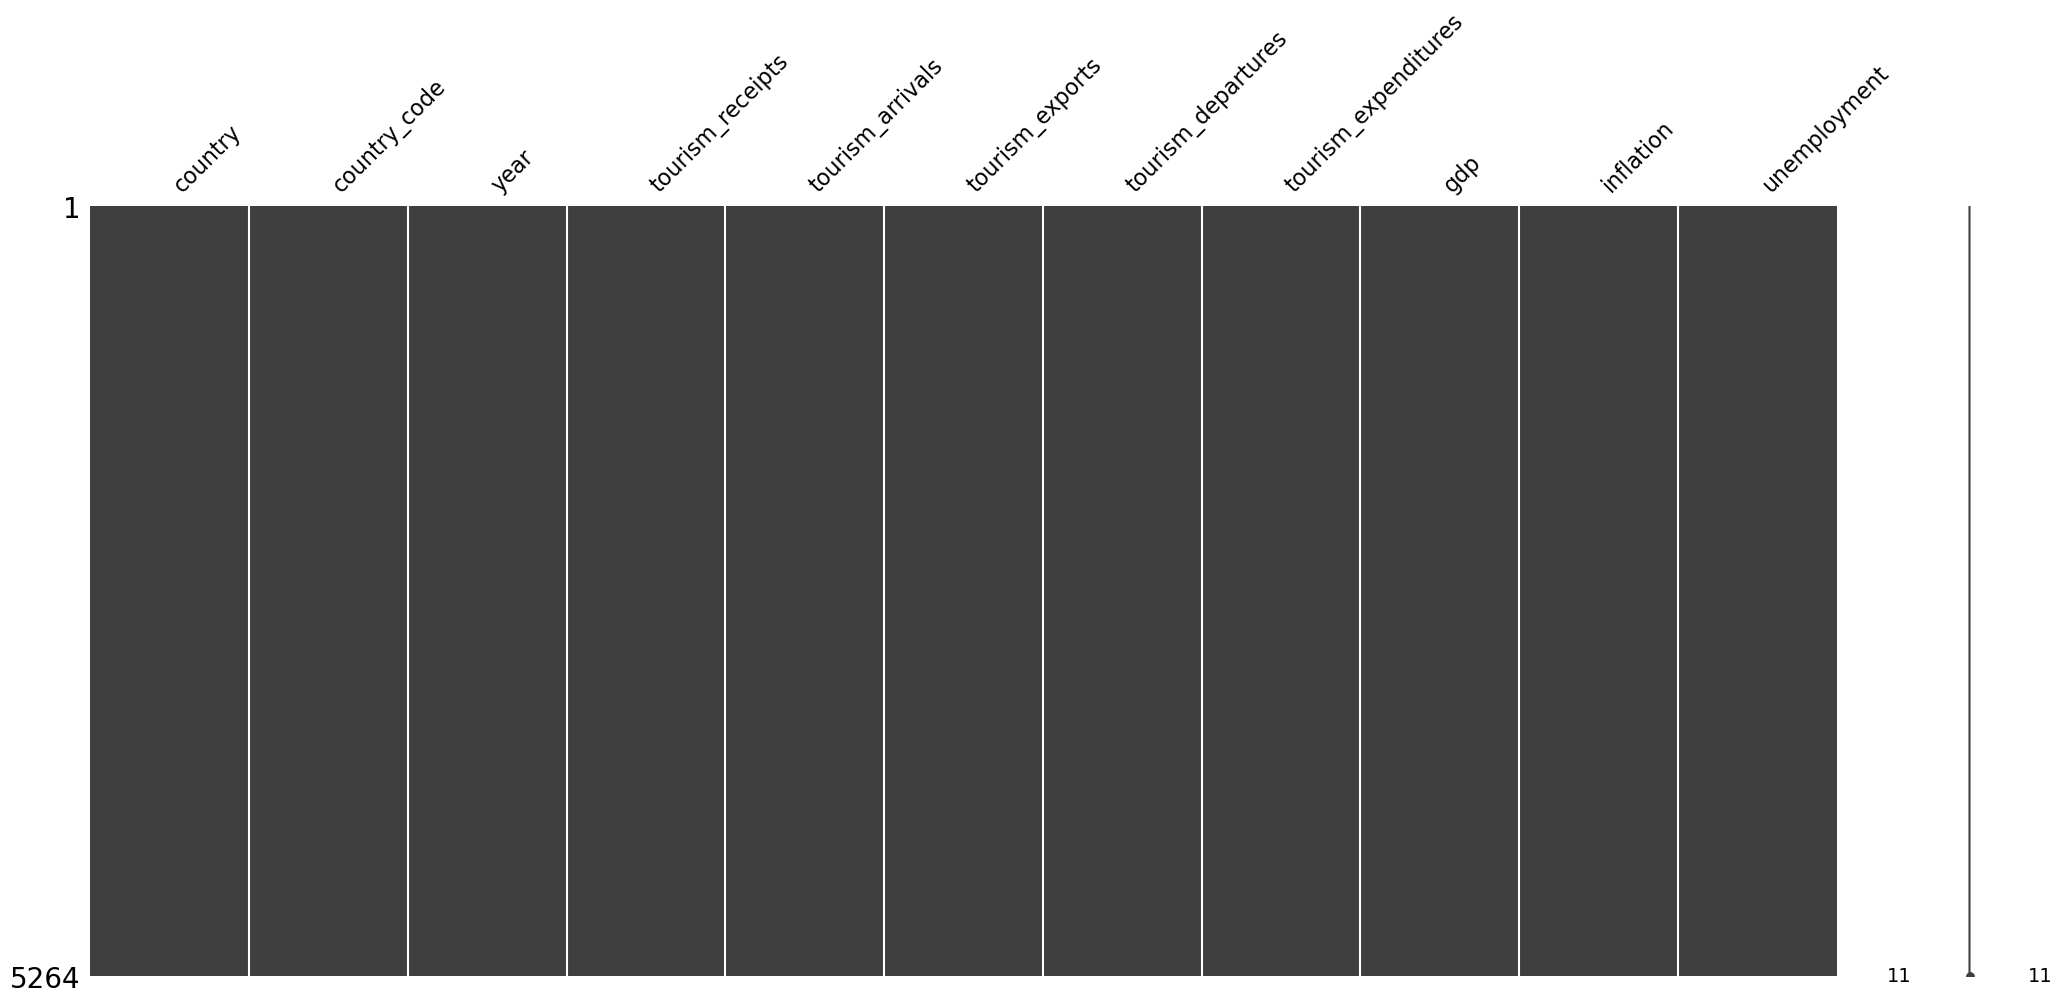

country                 0
country_code            0
year                    0
tourism_receipts        0
tourism_arrivals        0
tourism_exports         0
tourism_departures      0
tourism_expenditures    0
gdp                     0
inflation               0
unemployment            0
dtype: int64


In [19]:
# Make sure new data was correctly formed
msno.matrix(data)
plt.show()
print(data.isna().sum())

In [20]:
# Encode categorical columns - only needed for one column for a country ID and easier future analysis 
# - this column should be country (country name column) as the country code might have duplicates for different countries
encoder = LabelEncoder()

data['country_ID'] = encoder.fit_transform(data['country'])

data.head()

,country,country_code,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_departures,tourism_expenditures,gdp,inflation,unemployment,country_ID
0,aruba,abw,1999,7.820000e+08,9.720000e+05,62.542949,6.534997e+06,9.495387,1.722905e+09,2.280372,8.198614,12
1,africa eastern and southern,afe,1999,8.034209e+09,1.530938e+07,12.204030,6.534997e+06,7.760536,2.654290e+11,7.819865,8.198614,1
3,africa western and central,afw,1999,1.443613e+09,3.897975e+06,3.974476,6.534997e+06,6.147291,1.394680e+11,0.372266,8.198614,2
4,angola,ago,1999,3.100000e+07,4.500000e+04,0.583858,6.534997e+06,2.489638,6.152923e+09,248.195902,8.198614,7
5,albania,alb,1999,2.180000e+08,3.710000e+05,55.969191,6.534997e+06,3.699007,3.212122e+09,0.389438,18.400000,3


# Final Review -- Make Sure All Changes Were Implemented

In [22]:
data.duplicated().sum()

0

In [23]:
data.isna().sum()

country                 0
country_code            0
year                    0
tourism_receipts        0
tourism_arrivals        0
tourism_exports         0
tourism_departures      0
tourism_expenditures    0
gdp                     0
inflation               0
unemployment            0
country_ID              0
dtype: int64

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5264 entries, 0 to 6649
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               5264 non-null   object 
 1   country_code          5264 non-null   object 
 2   year                  5264 non-null   int64  
 3   tourism_receipts      5264 non-null   float64
 4   tourism_arrivals      5264 non-null   float64
 5   tourism_exports       5264 non-null   float64
 6   tourism_departures    5264 non-null   float64
 7   tourism_expenditures  5264 non-null   float64
 8   gdp                   5264 non-null   float64
 9   inflation             5264 non-null   float64
 10  unemployment          5264 non-null   float64
 11  country_ID            5264 non-null   int32  
dtypes: float64(8), int32(1), int64(1), object(2)
memory usage: 514.1+ KB


In [25]:
data.to_csv('C:/Users/miche/OneDrive/Desktop/Comp-2040 Python Essentials/Final Project/cleaned_data.csv')

**Explanation:**

First, I analyzed the dataset to find any values or features that I should clean. I looked for duplicates, missing/null values, and any outliers present. Then, I focused on dealing with the outliers, as this should occur before any analysis or cleaning begins. I found the IQR and subsequently removed the outliers identified in the initial analysis—the only inconsistent column found was GDP, which was addressed accordingly. After that, I handled the categorical values by converting them to lowercase and stripping them of white spaces. Next, I addressed the missing values. Due to the large number of missing values, I decided to fill in the mean of each column into the respective rows. After this, I dealt with the final issue concerning this dataset, which was the categorical data—country ID. With this dataset, I could have created two additional columns containing the encoded numerical values for the columns country and country_code, but that seemed redundant. So, I created one additional column for easier future review and analysis of the data, called country_ID. This column is the encoded country (country name) column. I decided to use this column only, as the country_code column would most likely have duplicates for countries with the same code. This way, each country would have its own ID assigned to it without creating duplicatesLastly, to ensure the cleaned dataset was updated in its file version, I uploaded it into a new one. . Finally, throughout this process, I used different built-in methods to ensure that all changes were being implemented, such as info, describe, and various visuals created like the matrix and boxplo t.

In [27]:
# Explanation:

# First, I analyzed the dataset to find any values or features that I should clean. I looked for duplicates, missing/null values, and any 
# outliers present. Then, I focused on dealing with the outliers, as this should occur before any analysis or cleaning begins. I found the 
# IQR and subsequently removed the outliers identified in the initial analysis—the only inconsistent column found was GDP, which was addressed 
# accordingly. After that, I handled the categorical values by converting them to lowercase and stripping them of white spaces. Next, I 
# addressed the missing values. Due to the large number of missing values, I decided to fill in the mean of each column into the respective rows. 
# After this, I dealt with the final issue concerning this dataset, which was the categorical data—country ID. With this dataset, I could have 
# created two additional columns containing the encoded numerical values for the columns country and country_code, but that seemed redundant. 
# So, I created one additional column for easier future review and analysis of the data, called country_ID. This column is the encoded country 
# (country name) column. I decided to use this column only, as the country_code column would most likely have duplicates for countries with the 
# same code. This way, each country would have its own ID assigned to it without creating duplicates. Lastly, to ensure the cleaned dataset was 
# updated in its file version, I uploaded it into a new one. Finally, throughout this process, I used different built-in methods to ensure that 
# all changes were being implemented, such as info, describe, and various visuals created like the matrix and boxplot.